In [ ]:
# Instructor: Mehdi Ataei
# Course code: INF2179
# Course name: Machine Learning with Applications in Python
# Faculty of Information
# University of Toronto
# Group Project
# Aaron Chen, Chloe Li, Rosa Lee, Danika Mariam

In [ ]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data from google drive (change path if needed)
dataset = pd.read_csv('/content/drive/MyDrive/INF2179-Group-Project/kijiji_rental_ads_4106.csv', index_col=0)
#dataset = pd.read_csv('kijiji_rental_ads_4106.csv', index_col=0)
df = dataset.copy()
len(df)

4106

In [ ]:
# check null values
df.isna().any()

Price($)                   True
Address                    True
Date Posted                True
Building Type              True
Bedrooms                   True
Bathrooms                  True
Utilities                  True
Wi-Fi and More             True
Parking Included           True
Agreement Type             True
Move-In Date               True
Pet Friendly               True
Size (sqft)                True
Furnished                  True
Air Conditioning           True
Personal Outdoor Space     True
Smoking Permitted          True
Appliances                 True
Amenities                  True
Description                True
Visit Counter              True
url                       False
dtype: bool

In [ ]:
# count null value of all columns
df.isnull().sum()

Price($)                   256
Address                     12
Date Posted                608
Building Type             1025
Bedrooms                  1025
Bathrooms                 1025
Utilities                 1968
Wi-Fi and More            1025
Parking Included          1025
Agreement Type            1025
Move-In Date              2098
Pet Friendly               347
Size (sqft)               1023
Furnished                   47
Air Conditioning          1025
Personal Outdoor Space    1025
Smoking Permitted         1025
Appliances                1535
Amenities                 2510
Description                186
Visit Counter             1677
url                          0
dtype: int64

In [ ]:
# spot multiple column have same amounot of null, drop rows corresponding to those variable
df.dropna(subset=['Building Type'], inplace=True)

In [ ]:
df.isnull().sum()

Price($)                   144
Address                      0
Date Posted                401
Building Type                0
Bedrooms                     0
Bathrooms                    0
Utilities                  943
Wi-Fi and More               0
Parking Included             0
Agreement Type               0
Move-In Date              1073
Pet Friendly                 0
Size (sqft)                  0
Furnished                    0
Air Conditioning             0
Personal Outdoor Space       0
Smoking Permitted            0
Appliances                 510
Amenities                 1485
Description                170
Visit Counter             1619
url                          0
dtype: int64

In [ ]:
# since we are predicting price, we don't want rows with no price
df.dropna(subset=['Price($)'], inplace=True)

In [ ]:
# delve into rows with null
df.isnull().sum()

Price($)                     0
Address                      0
Date Posted                364
Building Type                0
Bedrooms                     0
Bathrooms                    0
Utilities                  880
Wi-Fi and More               0
Parking Included             0
Agreement Type               0
Move-In Date              1064
Pet Friendly                 0
Size (sqft)                  0
Furnished                    0
Air Conditioning             0
Personal Outdoor Space       0
Smoking Permitted            0
Appliances                 469
Amenities                 1396
Description                165
Visit Counter             1595
url                          0
dtype: int64

In [ ]:
# Amenities, Visit Counter has too much null, dropped
df = df.drop(columns=['Amenities', 'Visit Counter'])
# Appliances can be re-visited later if needed
# maybe categorical variable for Freezer/Laundry/Dishwasher?
df = df.drop(columns=['Appliances'])
# Description not needed, move in date and date posted can be re-visit later if need
df = df.drop(columns=['Date Posted', 'Move-In Date', 'Description'])
# don't need address, url
df = df.drop(columns=['Address', 'url'])

In [ ]:
df.isnull().sum()

Price($)                    0
Building Type               0
Bedrooms                    0
Bathrooms                   0
Utilities                 880
Wi-Fi and More              0
Parking Included            0
Agreement Type              0
Pet Friendly                0
Size (sqft)                 0
Furnished                   0
Air Conditioning            0
Personal Outdoor Space      0
Smoking Permitted           0
dtype: int64

In [ ]:
# data left after dropping nulls
len(df)

2937

In [ ]:
# original column unique values
'''
array([nan, 'Hydro_No,Heat_No,Water_Yes', 'Hydro_No,Heat_Yes,Water_Yes',
       'Hydro_No,Heat_Yes,Water_No', 'Hydro_Yes,Heat_Yes,Water_Yes',
       'Hydro_Yes,Heat_No,Water_Yes', 'Hydro_Yes,Heat_Yes,Water_No',
       'Hydro_Yes,Heat_No,Water_No'], dtype=object)
'''
# can assume nan = No, No, No, split utilities to three columns
# Hydro, Heat, and Water all with 0 being no, 1 being yes
df[['Hydro', 'Heat', 'Water']] = df['Utilities'].str.split(',', expand=True)
df['Hydro'] = df['Hydro'].str.split('_').str[1].map({'Yes': 1, 'No': 0}).fillna(0)
df['Heat'] = df['Heat'].str.split('_').str[1].map({'Yes': 1, 'No': 0}).fillna(0)
df['Water'] = df['Water'].str.split('_').str[1].map({'Yes': 1, 'No': 0}).fillna(0)
df = df.drop(columns=['Utilities'])

In [ ]:
# original column unique values
'''
array(['Apartment', 'Condo', 'Basement', 'House', 'Duplex/Triplex',
       'Townhouse'], dtype=object)
'''
# Basement < Apartment < Condo < Duplex/Triplex < Townhouse < House
mapping = {
    'Basement': 0,
    'Apartment': 1,
    'Condo' : 2,
    'Duplex/Triplex': 3,
    'Townhouse' : 4,
    'House' : 5
}
# reduce one-hot dimension since we have limited data
# treat apartment and condo as same
df['Building Type'] = df['Building Type'].replace(mapping)
df['Wi-Fi and More'].unique()

array(['Not Included', 'Internet', 'Cable / TVInternet', 'Cable / TV'],
      dtype=object)

In [ ]:
# original column unique values
'''
array(['Not Included', 'Internet', 'Cable / TVInternet', 'Cable / TV'],
      dtype=object)
'''

# convert to yes or no wifi
df['Wi-Fi and More'] = df['Wi-Fi and More'].replace(np.nan, 'Not Included')
mapping = {
    'Not Included': 0,
    'Cable / TV': 0,
    'Internet' : 1,
    'Cable / TVInternet': 1
}

df['Wi-Fi and More'] = df['Wi-Fi and More'].replace(mapping)
df['Wi-Fi and More'].unique()

array([0, 1])

In [ ]:
# original column unique values
'''
array(['0', '1', '2', '3+'], dtype=object)
'''
# 0 = 0, 1 = 1, 2 = 2, 3 = 3+
# to make sure mapping correct
# since there is order
mapping = {
    '0': 0,
    '1': 1,
    '2' : 2,
    '3+': 3
}

df['Parking Included'] = df['Parking Included'].replace(mapping)
df['Parking Included'].unique()

array([0, 1, 2, 3])

In [ ]:
# original column unique values
'''
array(['Yes', 'Limited', 'No'], dtype=object)
'''
# treat limited as NO
mapping = {
    'No' : 0,
    'Limited' : 0,
    'Yes' : 1
}
df['Pet Friendly'] = df['Pet Friendly'].replace(mapping)
df['Pet Friendly'].unique()

array([1, 0])

In [ ]:
# original column unique values
'''
array(['Not Included', 'Balcony', 'Yard', 'YardBalcony'], dtype=object)
'''
# treat outdoor space as ordinal (No < Bal < Yard < YardBal)
mapping = {
    'Not Included' : 0,
    'Balcony' : 1,
    'Yard' : 2,
    'YardBalcony' : 3
}
df['Personal Outdoor Space'] = df['Personal Outdoor Space'].replace(mapping)
df['Personal Outdoor Space'].unique()

array([0, 1, 2, 3])

In [ ]:
# original column unique values
'''
array(['No', 'Yes'], dtype=object)
'''
mapping = {
    'No' : 0,
    'Yes' : 1,
}
df['Furnished'] = df['Furnished'].replace(mapping)
df['Furnished'].unique()

array([0, 1])

In [ ]:
# original column unique values
'''
array(['No', 'Yes', 'Outdoors only'], dtype=object)
'''
# treat outdoors only as no
mapping = {
    'No' : 0,
    'Outdoors only': 0,
    'Yes' : 1,
}
df['Smoking Permitted'] = df['Smoking Permitted'].replace(mapping)
df['Smoking Permitted'].unique()

array([0, 1])

In [ ]:
# original column unique values
'''
array(['No', 'Yes', 'Not Available'], dtype=object)
'''
# treat not available as No
mapping = {
    'No' : 0,
    'Not Available': 0,
    'Yes' : 1,
}
df['Air Conditioning'] = df['Air Conditioning'].replace(mapping)
df['Air Conditioning'].unique()

array([0, 1])

In [ ]:
# original column unique values
'''
array(['1', '1.5', '2', '2.5', '3', '6+'], dtype=object)
'''
mapping = {
    '1' : 0,
    '1.5': 1,
    '2' : 2,
    '2.5': 3,
    '3': 4,
    '6+': 5
}
df['Bathrooms'] = df['Bathrooms'].replace(mapping)
df['Bathrooms'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
# original column unique values
'''
array(['2', 'Bachelor/Studio', '1', '3', '2 + Den', '1 + Den', '3 + Den',
       '4', '5+', '4 + Den'], dtype=object)
'''
# treat den as one more room
mapping = {
    'Bachelor/Studio':0,
    '1': 1,
    '1 + Den': 2,
    '2': 3,
    '2 + Den': 4,
    '3': 5,
    '3 + Den': 6,
    '4' : 7,
    '4 + Den' : 8,
    '5+' : 9,
}

df['Bedrooms'] = df['Bedrooms'].replace(mapping)
df['Bedrooms'].unique()

array([3, 0, 1, 5, 4, 2, 6, 7, 9, 8])

In [ ]:
# original column unique values
'''
array(['1 Year', 'Month-to-month', 'Not Available'], dtype=object)

'''
# treat as oridinal (not available < 1 year < month-to-month)
mapping = {
    'Not Available' : 0,
    '1 Year': 1,
    'Month-to-month' : 2,
}
df['Agreement Type'] = df['Agreement Type'].replace(mapping)
df['Agreement Type'].unique()

array([1, 2, 0])

In [ ]:
# 529 column out of 2937 does not have sqft data
#df['Size (sqft)'] = df['Size (sqft)'].replace('Not Available', np.nan)
df = df.loc[df['Size (sqft)'] != 'Not Available']
# sqft size consist of number represented with ',' for example 1,282, remove the ','
# and convert to float
df['Size (sqft)'] = df['Size (sqft)'].str.replace(',','').astype('float')
#df['Size (sqft)'] = pd.to_numeric(df['Size (sqft)'])

<ipython-input-26-5d4ed3f7cf0d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size (sqft)'] = df['Size (sqft)'].str.replace(',','').astype('float')


<Axes: xlabel='Price($)'>

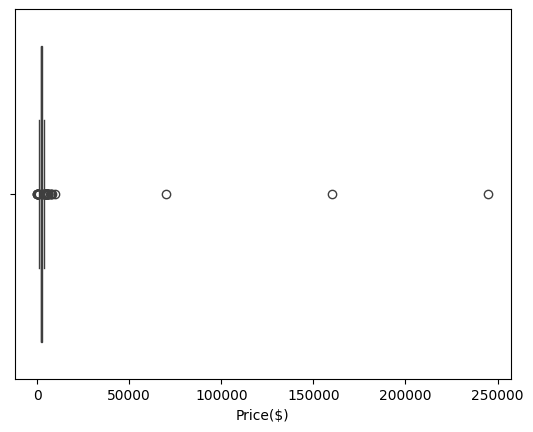

In [ ]:
# three datapoint that is too much of a outlier
sns.boxplot(data=df, x='Price($)')

In [ ]:
# there are three datapoint with a very high price, remove it (higher then 50000)
df = df.loc[df['Price($)'] < 50000]

<Axes: xlabel='Price($)'>

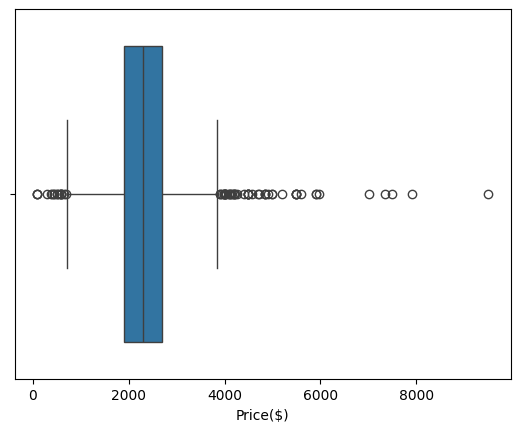

In [ ]:
sns.boxplot(data=df, x='Price($)')

In [ ]:
df[['Price($)', 'Size (sqft)', 'Bedrooms', 'Bathrooms', 'Parking Included', 'Building Type']].describe()

,Price($),Size (sqft),Bedrooms,Bathrooms,Parking Included,Building Type
count,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000
mean,2339.968399,753.580873,1.889813,0.237422,0.303950,1.054470
std,697.952557,643.763534,1.453637,0.651196,0.513063,0.870066
min,99.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1905.000000,550.000000,1.000000,0.000000,0.000000,1.000000
50%,2297.000000,700.000000,1.000000,0.000000,0.000000,1.000000
75%,2700.000000,884.000000,3.000000,0.000000,1.000000,1.000000
max,9500.000000,20000.000000,9.000000,5.000000,3.000000,5.000000


In [ ]:
df['Size (sqft)']

Title
6020 Bathurst Street - Valencia Towers Apartment for Rent            912.0
RENOVATED BACHELOR SUITE  AVAILABLE! Lakeview Towers                 445.0
50 Driftwood - Ruby Heights Apartment for Rent                       904.0
1 Bed Apartment Rent today                                           665.0
Chatsworth Apartments - 1 Bdrm available at 2928 Yonge Street, T     680.0
                                                                     ...  
One bedroom apartment for rent in downtown                           500.0
Apartment for rent                                                  1400.0
Little-Italy Jr. 1 Bedroom for rent                                  400.0
1 bdr condo Loblaws building - high floor city VIEW                  500.0
Basement Apartment Rental - Newly Renovated                         1000.0
Name: Size (sqft), Length: 2405, dtype: float64

In [ ]:
df.isnull().sum()

Price($)                  0
Building Type             0
Bedrooms                  0
Bathrooms                 0
Wi-Fi and More            0
Parking Included          0
Agreement Type            0
Pet Friendly              0
Size (sqft)               0
Furnished                 0
Air Conditioning          0
Personal Outdoor Space    0
Smoking Permitted         0
Hydro                     0
Heat                      0
Water                     0
dtype: int64

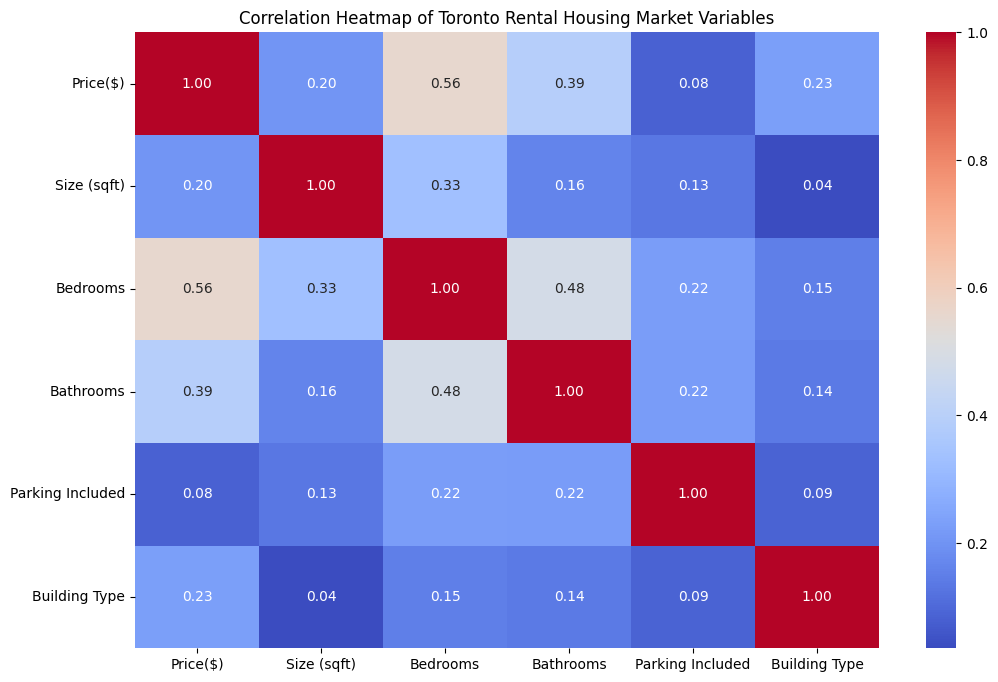

In [ ]:
# Drop non-numeric columns as correlation works only with numeric data
numeric_df = df[['Price($)', 'Size (sqft)', 'Bedrooms', 'Bathrooms', 'Parking Included', 'Building Type']]
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Toronto Rental Housing Market Variables')
plt.show()


In [ ]:
print(len(df))

2405


In [ ]:
from sklearn.preprocessing import StandardScaler  # To standardize features
from sklearn.linear_model import LinearRegression  # Logistic regression model
from sklearn.model_selection import train_test_split  # To split the data into training and test sets
from sklearn.model_selection import KFold  # For K-fold cross-validation
from sklearn.metrics import make_scorer, confusion_matrix  # For creating custom metrics and confusion matrices
from sklearn.model_selection import learning_curve  # To generate a learning curve
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn import tree

sns.set_style('whitegrid')  # Set the style of seaborn plots to 'whitegrid'

# This command makes sure that plots are displayed inline in the Jupyter Notebook.
%matplotlib inline

def normalize_data(X_train, X_test):

  # normalize data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)

  # use coeficient in train data to scale test data
  X_test = scaler.transform(X_test)

  return X_train, X_test

def plot_prediction_vs_actual_curve(y_test, y_pred, plot_title):
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred)
  p1 = max(max(y_pred), max(y_test))
  p2 = min(min(y_pred), min(y_test))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(plot_title + ' predicted vs. actual Values')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.show()

def plot_hist_residual(y_test, y_pred, plot_title):
  plt.figure(figsize=(10, 6))
  plt.hist(y_test - y_pred)
  plt.title(plot_title + ' Distribution of Residuals')
  plt.xlabel('Residuals')
  plt.ylabel('Frequency')
  plt.show()

def plot_model_coef(column_names, coef, plot_title):
  plt.figure(figsize=(10, 6))
  sns.barplot(x=coef, y=column_names)
  plt.title(plot_title)
  plt.xlabel('Coefficient Value')
  plt.ylabel('Features')
  plt.show()

def plot_qq_plot(y_test, y_pred, plot_title):
  plt.figure(figsize=(10, 6))
  sm.qqplot(y_test - y_pred, line='r')
  plt.title(plot_title + ' QQ Plot of Residuals')
  plt.show()

def linear_regression(X_train, X_test, y_train, y_test, x_columns, nfold, plot=True):
  model = LinearRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)

  mse = mean_squared_error(y_test, predictions) / len(y_test)
  print('mean square error: ', mse)

  if plot:
    plot_prediction_vs_actual_curve(y_test, predictions, nfold + ' linear regression')
    plot_hist_residual(y_test, predictions, nfold + ' linear regression')
    plot_model_coef(x_columns, model.coef_[0], nfold + ' linear regression coefficient')
    plot_qq_plot(y_test, predictions, nfold + ' linear regression')

  return mse

def decisionTreeRegression(X_train, X_test, y_train, y_test, x_columns, plot, depth):
  regr = DecisionTreeRegressor(max_depth=depth)
  regr.fit(X_train, y_train)
  predictions = regr.predict(X_test)
  predictions = predictions.reshape(len(predictions),1)

  mse = mean_squared_error(y_test, predictions) / len(y_test)
  print('mean square error: ', mse)

  if plot:
    plot_prediction_vs_actual_curve(y_test, predictions, 'decision tree')
    #plot_hist_residual(y_test, predictions, 'decision tree')
    #plot_model_coef(x_columns, model.coef_[0], 'linear regression coefficient')
    #plot_qq_plot(y_test, predictions, 'decision tree')

    plt.figure(figsize=(20, 12))
    tree.plot_tree(regr,
                   feature_names=x_columns,
                   filled=True)

    dfFeatures = pd.DataFrame({'Features':x_columns,'Importances':regr.feature_importances_})
    dfFeatures.sort_values(by='Importances',ascending=False)
    print(dfFeatures)

  return mse

def randomForestRegression(X_train, X_test, y_train, y_test, x_columns, plot, depth):
  regr = RandomForestRegressor(max_depth=depth, random_state=0)
  regr.fit(X_train, y_train)
  predictions = regr.predict(X_test)
  predictions = predictions.reshape(len(predictions),1)

  mse = mean_squared_error(y_test, predictions) / len(y_test)
  print('mean square error: ', mse)

  if plot:
    plot_prediction_vs_actual_curve(y_test, predictions, 'random forest')
    #plot_hist_residual(y_test, predictions, 'decision tree')
    #plot_model_coef(x_columns, model.coef_[0], 'linear regression coefficient')
    #plot_qq_plot(y_test, predictions, 'decision tree')

    dfFeatures = pd.DataFrame({'Features':x_columns,'Importances':regr.feature_importances_})
    dfFeatures.sort_values(by='Importances',ascending=False)
    print(dfFeatures)

  return mse

In [ ]:
from sklearn.model_selection import train_test_split

# define x column and y column
x_columns = ['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Parking Included', 'Building Type', 'Wi-Fi and More',
             'Agreement Type', 'Pet Friendly', 'Furnished', 'Air Conditioning', 'Personal Outdoor Space',
             'Smoking Permitted', 'Hydro', 'Heat', 'Water']

y_column = ['Price($)']

X = df[x_columns]
y = df[y_column]

X_all, X_not_seen, y_all, y_not_seen = train_test_split(X, y, shuffle=False, test_size=0.2)
#X_train, X_test = normalize_data(X_train, X_test)
print(len(X_all), X.shape)
print(len(X_not_seen), y.shape)

1924 (2405, 15)
481 (2405, 1)


mean square error:  484.84907816822164
Fold 1: MSE: 484.84907816822164
mean square error:  840.3657109164114
Fold 2: MSE: 840.3657109164114
mean square error:  536.6906852820923
Fold 3: MSE: 536.6906852820923
mean square error:  708.153613322794
Fold 4: MSE: 708.153613322794
mean square error:  920.2071872759722
Fold 5: MSE: 920.2071872759722
Average Score: 698.0532549930983 (168.04827990632302)
mean square error:  717.0330612310703


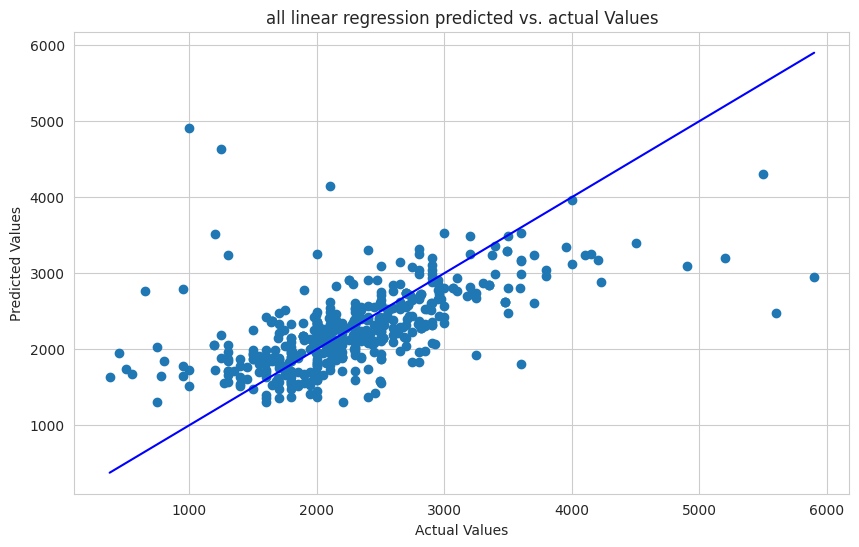

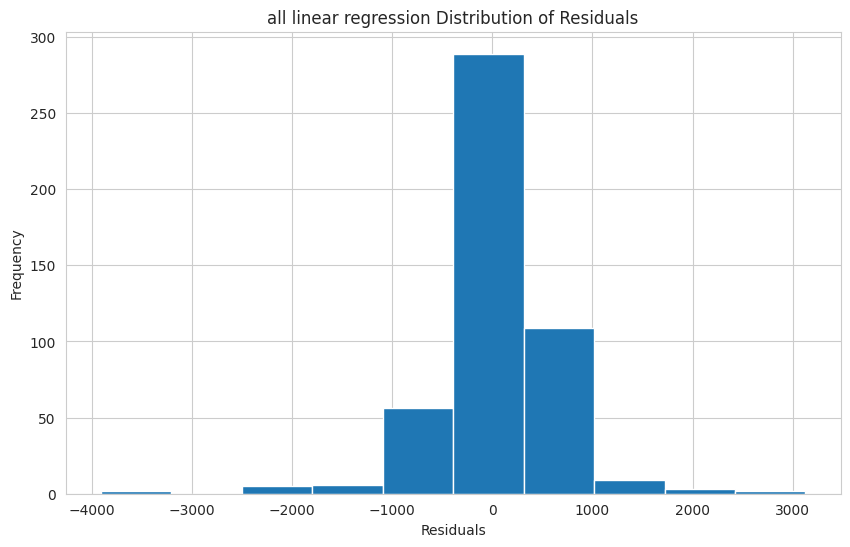

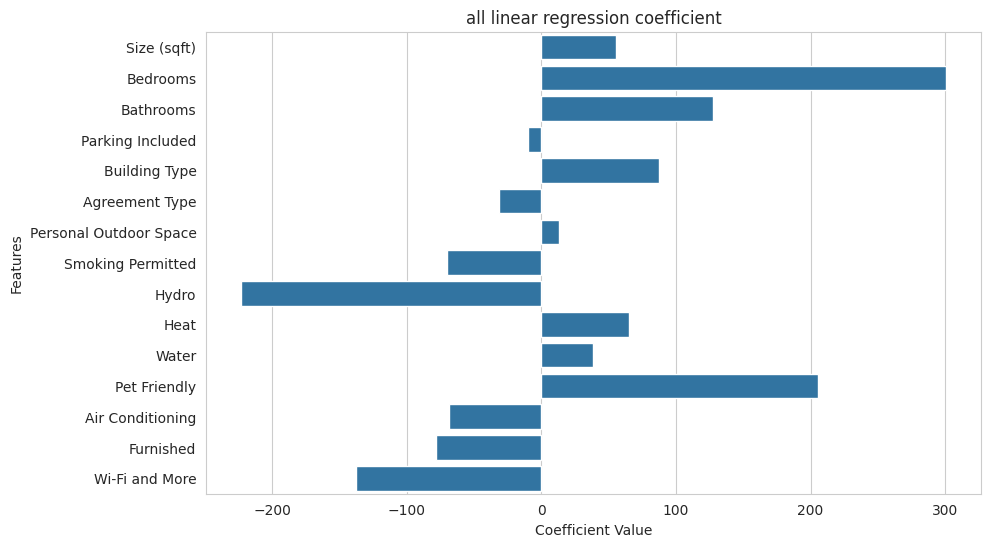

<Figure size 1000x600 with 0 Axes>

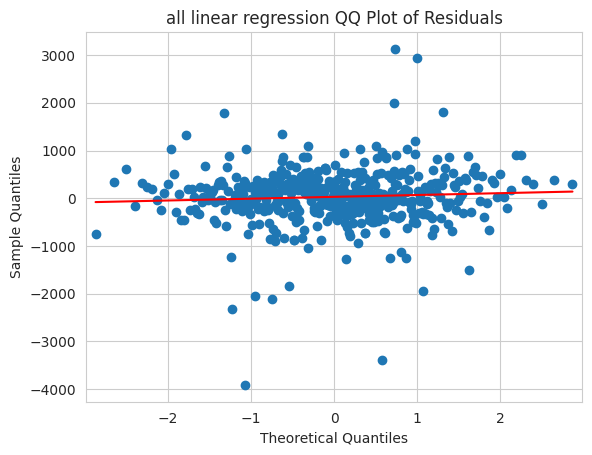

717.0330612310703

In [ ]:
####################################LINEAR REGRESSION###########################

# defince x column and y column for current model
num_columns = ['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Parking Included', 'Building Type',
             'Agreement Type', 'Personal Outdoor Space',]
#num_columns = ['Size (sqft)', 'Bedrooms']

cat_columns = ['Smoking Permitted', 'Hydro', 'Heat', 'Water', 'Pet Friendly', 'Air Conditioning', 'Furnished',
               'Wi-Fi and More']
#cat_columns = []

# k-fold cross validation
num_folds = 5
kfold = KFold(n_splits = num_folds)
kfold.get_n_splits(X_all)

mse = np.zeros(num_folds)

count = 0

for train_idx, test_idx in kfold.split(X_all):
  # we don't want to normalize categorical data
  X_train_cat = X_all[cat_columns].values[train_idx]
  X_test_cat = X_all[cat_columns].values[test_idx]

  # get numeric value from data set
  X_train, X_test = X_all[num_columns].values[train_idx], X_all[num_columns].values[test_idx]
  y_train, y_test = y_all.values[train_idx], y_all.values[test_idx]

  # normalize
  X_train, X_test = normalize_data(X_train, X_test)

  # add the categorical data back
  X_train = np.append(X_train, X_train_cat, axis=1)
  X_test = np.append(X_test, X_test_cat, axis=1)

  result = linear_regression(X_train, X_test, y_train, y_test, num_columns + cat_columns, str(count+1) + 'fold', False)

  mse[count] = result

  count += 1

  # Print the accuracy for the current fold
  print("Fold {}: MSE: {}".format(count, result))

# Print the average accuracy across all folds
print("Average Score: {} ({})".format(np.mean(mse), np.std(mse)))

###############################################

# run model on all data
# we don't want to normalize categorical data
X_all_cat = X_all[cat_columns].values
X_not_seen_cat = X_not_seen[cat_columns].values

# get numeric value from data set
X_all_num, X_not_seen_num = X_all[num_columns].values, X_not_seen[num_columns].values

# convert to numpy
y_all_num, y_not_seen_num = y_all.values, y_not_seen.values

# normalize data
scaler = StandardScaler()
X_all_normalize = scaler.fit_transform(X_all_num)

# use coeficient in train data to scale test data
X_not_seen_normalize = scaler.transform(X_not_seen_num)

# add the categorical data back
X_all_normalize = np.append(X_all_normalize, X_all_cat, axis=1)
X_not_seen_normalize = np.append(X_not_seen_normalize, X_not_seen_cat, axis=1)

# linear regression
linear_regression(X_all_normalize, X_not_seen_normalize, y_all_num, y_not_seen_num, num_columns + cat_columns, 'all', True)

mean square error:  577.8661457345555
mean square error:  1011.5800578739595
mean square error:  730.3866634509506
mean square error:  887.779991995374
mean square error:  1132.526394948721
mean square error:  465.7853989946219
mean square error:  1134.7957501109013
mean square error:  1006.0191020394275
mean square error:  845.3454286456691
mean square error:  1396.2529251284193
mean square error:  498.45627706564727
mean square error:  1501.284890509923
mean square error:  1108.0818746416878
mean square error:  1325.8943407762836
mean square error:  1115.4768799204885
mean square error:  482.26340811641467
mean square error:  1511.7841096025188
mean square error:  1125.539186161337
mean square error:  1294.7042024730283
mean square error:  1392.589971283336
The optimal decision tree model uses depth=3, achieving a cross-validation mse of 868.027850800712 with a standard deviation of 197.02577224096441.
mean square error:  1016.4675278747675


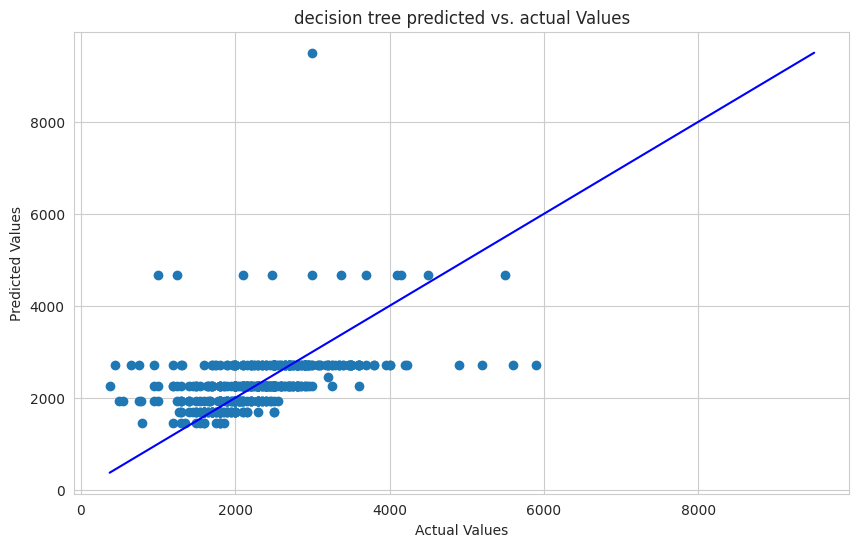

                  Features  Importances
0              Size (sqft)     0.210888
1                 Bedrooms     0.537946
2                Bathrooms     0.112354
3         Parking Included     0.000000
4            Building Type     0.138812
5           Agreement Type     0.000000
6   Personal Outdoor Space     0.000000
7        Smoking Permitted     0.000000
8                    Hydro     0.000000
9                     Heat     0.000000
10                   Water     0.000000
11            Pet Friendly     0.000000
12        Air Conditioning     0.000000
13               Furnished     0.000000
14          Wi-Fi and More     0.000000


1016.4675278747675

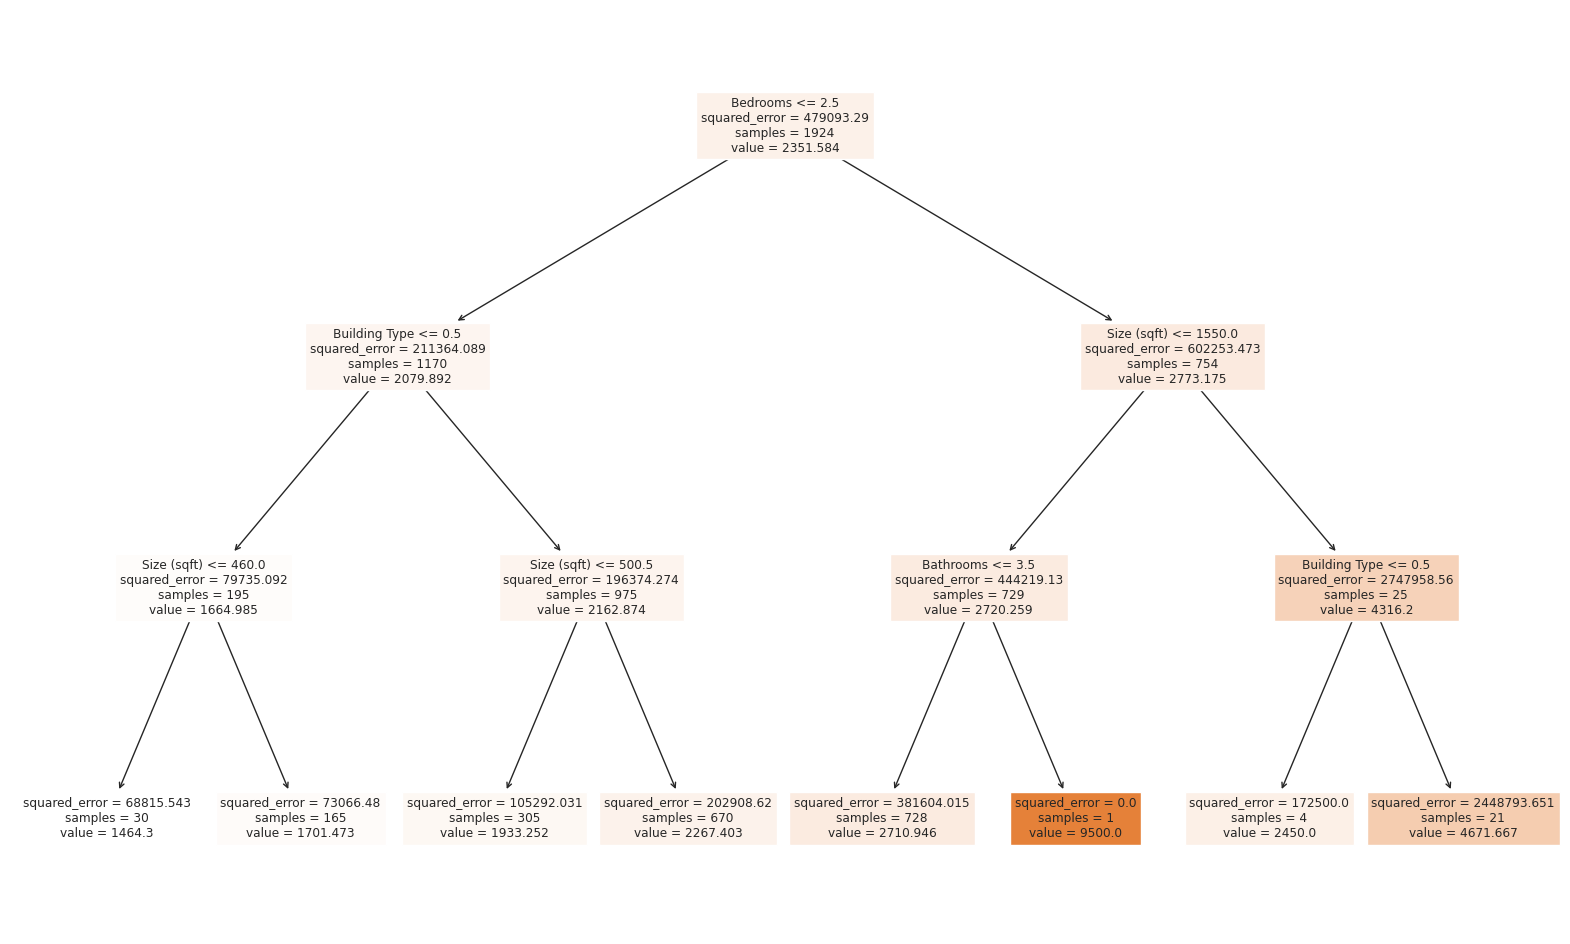

In [ ]:
####################################DECISION TREES###########################

# defince x column and y column for current model
columns = ['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Parking Included', 'Building Type',
           'Agreement Type', 'Personal Outdoor Space', 'Smoking Permitted',
           'Hydro', 'Heat', 'Water', 'Pet Friendly', 'Air Conditioning', 'Furnished',
           'Wi-Fi and More']

# k-fold cross validation
num_folds = 5
kfold = KFold(n_splits = num_folds)
kfold.get_n_splits(X_all)

best_mse = float('inf')
best_depth = 3
best_std = 0

for depth in [3, 5, 50, 500]:
  mse = np.zeros(num_folds)
  count = 0
  for train_idx, test_idx in kfold.split(X_all):
    # dont normalize data for better visualization
    X_train, X_test = X_all[columns].values[train_idx], X_all[columns].values[test_idx]
    y_train, y_test = y_all.values[train_idx], y_all.values[test_idx]

    # run the decision tree model
    result = decisionTreeRegression(X_train, X_test, y_train, y_test, columns, False, depth)

    mse[count] = result
    count += 1

  # find the best parameter
  if np.mean(mse) < best_mse:
    best_mse = np.mean(mse)
    best_depth = depth
    best_std = np.std(mse)

# Print the best parameters and the corresponding score
print("The optimal decision tree model uses depth={}, achieving a cross-validation mse of {} with a standard deviation of {}.".format(best_depth, best_mse, best_std))

###############################################

# run model on all data

# get numeric value from data set
X_all_num, X_not_seen_num = X_all[columns].values, X_not_seen[columns].values

# convert to numpy
y_all_num, y_not_seen_num = y_all.values, y_not_seen.values

# regression tree
decisionTreeRegression(X_all_num, X_not_seen_num, y_all_num, y_not_seen_num, columns, True, depth=best_depth)


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  497.1768857315005


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  915.7623234885381


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  663.4258007463299


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  782.397007237366


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  949.128811305097


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  386.2815942333033


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  886.992451831361


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  614.6735499378258


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  699.6759134429699


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  854.2389910700159


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  321.79958858008075


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  852.6598286712006


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  577.4705252822682


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  661.9505135923566


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  868.8552447166584


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  321.79958858008075


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  852.6598286712006


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  577.4705252822682


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  661.9505135923566


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  868.8552447166584
The optimal random forest model uses depth=50, achieving a cross-validation mse of 656.5471401685129 with a standard deviation of 200.93439158553892.


<ipython-input-35-57dd5d0c6c2b>:106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


mean square error:  648.9013065548285


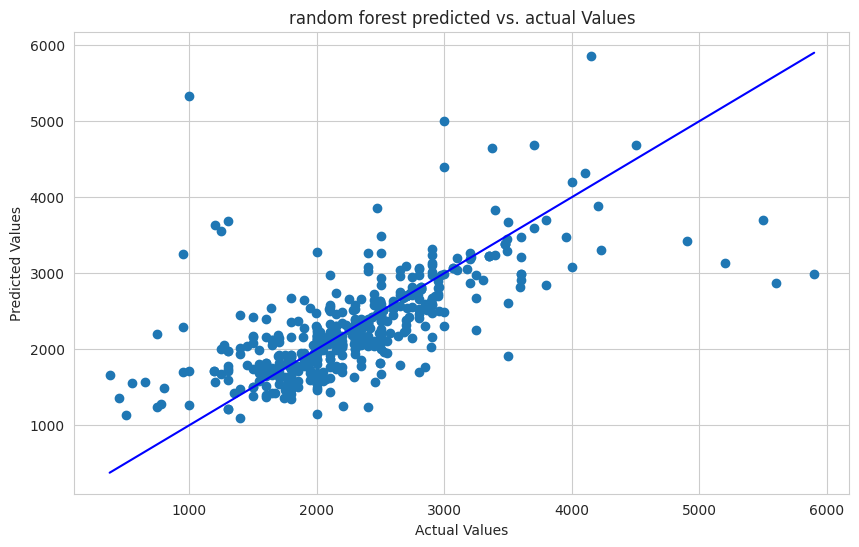

                  Features  Importances
0              Size (sqft)     0.280696
1                 Bedrooms     0.305019
2                Bathrooms     0.068343
3         Parking Included     0.031840
4            Building Type     0.099116
5           Agreement Type     0.037654
6   Personal Outdoor Space     0.029152
7        Smoking Permitted     0.005621
8                    Hydro     0.023328
9                     Heat     0.015275
10                   Water     0.022462
11            Pet Friendly     0.020649
12        Air Conditioning     0.016996
13               Furnished     0.026022
14          Wi-Fi and More     0.017826


648.9013065548285

In [ ]:
####################################Random Forest###########################

# defince x column and y column for current model
columns = ['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Parking Included', 'Building Type',
           'Agreement Type', 'Personal Outdoor Space', 'Smoking Permitted',
           'Hydro', 'Heat', 'Water', 'Pet Friendly', 'Air Conditioning', 'Furnished',
           'Wi-Fi and More']

# k-fold cross validation
num_folds = 5
kfold = KFold(n_splits = num_folds)
kfold.get_n_splits(X_all)

best_mse = float('inf')
best_depth = 3
best_std = 0

for depth in [3, 5, 50, 500]:
  mse = np.zeros(num_folds)
  count = 0
  for train_idx, test_idx in kfold.split(X_all):
    # dont normalize data for better visualization
    X_train, X_test = X_all[columns].values[train_idx], X_all[columns].values[test_idx]
    y_train, y_test = y_all.values[train_idx], y_all.values[test_idx]

    # run the decision tree model
    result = randomForestRegression(X_train, X_test, y_train, y_test, columns, False, depth)

    mse[count] = result
    count += 1

  # find the best parameter
  if np.mean(mse) < best_mse:
    best_mse = np.mean(mse)
    best_depth = depth
    best_std = np.std(mse)

# Print the best parameters and the corresponding score
print("The optimal random forest model uses depth={}, achieving a cross-validation mse of {} with a standard deviation of {}.".format(best_depth, best_mse, best_std))

###############################################

# run model on all data

# get numeric value from data set
X_all_num, X_not_seen_num = X_all[columns].values, X_not_seen[columns].values

# convert to numpy
y_all_num, y_not_seen_num = y_all.values, y_not_seen.values

# random forest
randomForestRegression(X_all_num, X_not_seen_num, y_all_num, y_not_seen_num, columns, True, depth=best_depth)